In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_csv("C:\\Users\\MansiJadhav\\Python-for-Machine-Learning-&-Data-Science-Masterclass\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\mushrooms.csv")

In [68]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [69]:
X = df.drop('class', axis=1)

In [70]:
X = pd.get_dummies(X, drop_first=True)

In [71]:
y = df['class']

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
model = GradientBoostingClassifier()

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
param_grid = {'n_estimators':[50,100], 'learning_rate':[0.1,0.05,0.2], 'max_depth':[3,4,5]}

In [79]:
grid = GridSearchCV(model, param_grid)

In [80]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [81]:
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix

In [82]:
predictions = grid.predict(X_test)

In [83]:
predictions

array(['p', 'e', 'p', 'e', 'e', 'e', 'e', 'p', 'e', 'e', 'e', 'p', 'e',
       'e', 'p', 'e', 'p', 'e', 'e', 'p', 'e', 'p', 'e', 'p', 'p', 'e',
       'e', 'p', 'e', 'e', 'e', 'e', 'e', 'p', 'p', 'p', 'e', 'e', 'p',
       'p', 'e', 'p', 'e', 'p', 'p', 'p', 'p', 'p', 'e', 'p', 'p', 'p',
       'p', 'p', 'p', 'p', 'p', 'e', 'e', 'e', 'e', 'e', 'p', 'p', 'p',
       'p', 'p', 'e', 'p', 'e', 'e', 'p', 'e', 'p', 'p', 'e', 'e', 'p',
       'e', 'e', 'e', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'e', 'e',
       'e', 'e', 'p', 'p', 'e', 'e', 'e', 'e', 'p', 'e', 'p', 'p', 'p',
       'p', 'p', 'e', 'p', 'e', 'e', 'e', 'p', 'e', 'e', 'e', 'e', 'e',
       'e', 'e', 'p', 'e', 'e', 'p', 'p', 'e', 'p', 'e', 'p', 'e', 'e',
       'p', 'e', 'p', 'p', 'e', 'p', 'p', 'e', 'e', 'p', 'e', 'e', 'p',
       'p', 'e', 'e', 'e', 'p', 'p', 'p', 'e', 'e', 'p', 'e', 'e', 'p',
       'e', 'e', 'e', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'e',
       'e', 'e', 'e', 'e', 'e', 'e', 'p', 'e', 'p', 'e', 'p', 'p

In [84]:
grid.best_estimator_

GradientBoostingClassifier(n_estimators=50)

In [85]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [86]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       444
           p       1.00      1.00      1.00       369

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [88]:
feat_imp = grid.best_estimator_.feature_importances_

In [90]:
imp_features = pd.DataFrame(index=X.columns, data=feat_imp, columns=['Importance'])

In [91]:
imp_features

,Importance
cap-shape_c,1.719903e-04
cap-shape_f,5.109697e-17
cap-shape_k,2.045415e-17
cap-shape_s,0.000000e+00
cap-shape_x,0.000000e+00
...,...
habitat_l,0.000000e+00
habitat_m,0.000000e+00
habitat_p,0.000000e+00
habitat_u,3.489042e-17


In [99]:
imp_features = imp_features[imp_features['Importance'] > 0.0005].sort_values('Importance')

In [100]:
imp_features

,Importance
ring-number_o,0.000612
ring-type_p,0.001085
odor_m,0.001147
stalk-color-below-ring_c,0.001574
cap-surface_g,0.001687
cap-color_y,0.002466
stalk-color-above-ring_c,0.002558
stalk-color-below-ring_y,0.003003
stalk-root_e,0.003032
stalk-surface-below-ring_s,0.003155


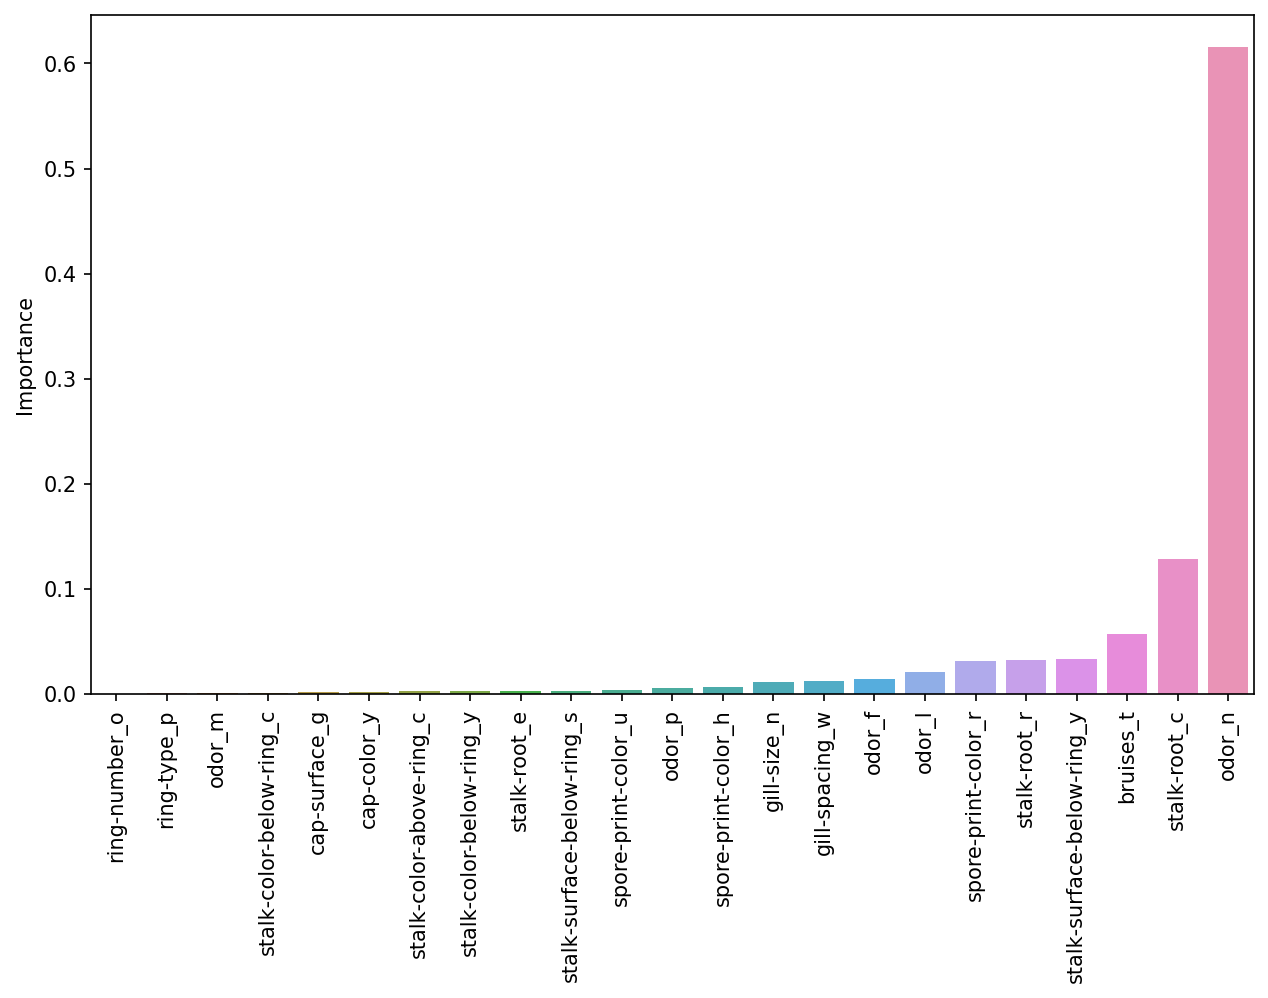

In [101]:
plt.figure(figsize=(10,6), dpi=150)
sns.barplot(data=imp_features, x=imp_features.index, y='Importance')
plt.xticks(rotation=90);